# Introduction to OpenAI gym

In [119]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [47]:
env = gym.make('MsPacman-v0')
obs = env.reset()
obs.shape

(210, 160, 3)

In [13]:
def plot_environment(env, figsize=(8, 6)):
    plt.close()
    plt.figure(figsize=figsize)
    img = env.render(mode="rgb_array")
    plt.imshow(img)
    plt.axis("off")
    plt.show()

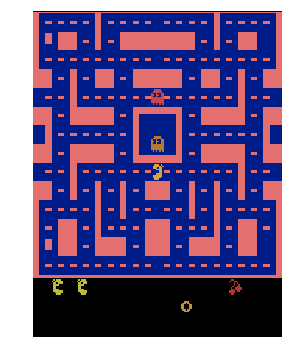

In [48]:
plot_environment(env)

In [49]:
env.action_space

Discrete(9)

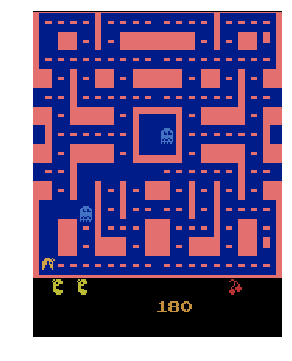

In [50]:
for i in range(110):
    env.step(3)
for i in range(40):
    env.step(8)

plot_environment(env)

In [51]:
obs, reward, done, info = env.step(0)

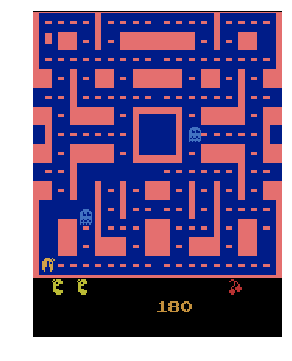

In [52]:
plot_environment(env)

In [53]:
obs.shape

(210, 160, 3)

In [54]:
reward

0.0

In [55]:
done

False

In [56]:
info

{'ale.lives': 3}

In [62]:
frames = []

n_max_steps = 1000
n_change_steps = 10

obs = env.reset()
for step in range(n_max_steps):
    img = env.render(mode="rgb_array")
    frames.append(img)
    if step % n_change_steps == 0:
        action = env.action_space.sample() # play randomly
    obs, reward, done, info = env.step(action)
    if done:
        break

In [66]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    plt.close()  # or else nbagg sometimes plots in the previous cell
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    return animation.FuncAnimation(fig, update_scene, fargs=(frames, patch), frames=len(frames), repeat=repeat, interval=interval)

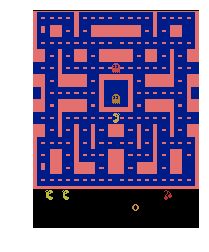

In [68]:
import matplotlib.animation as animation
video = plot_animation(frames)
plt.show()

In [71]:
env.observation_space.shape

(210, 160, 3)

In [72]:
env.close()

## A simple environment: the Cart-Pole

In [73]:
import gym

In [74]:
env = gym.make("CartPole-v0")
obs = env.reset()
obs

array([ 0.03220659, -0.02116077,  0.00380859, -0.00791831])

horizontal position,   velocity,   angle of the pole,   angular velocity

In [75]:
img = env.render(mode="rgb_array")

In [76]:
img.shape

(800, 1200, 3)

In [77]:
import matplotlib.pyplot as plt

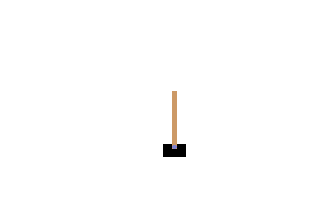

In [78]:
plt.figure(figsize=(5,4))
plt.imshow(img)
plt.axis("off")
plt.show()

In [79]:
env.action_space

Discrete(2)

In [80]:
action = 1
obs, reward, done, info = env.step(action)

In [81]:
obs

array([ 0.03178337,  0.17390635,  0.00365022, -0.29939715])

In [82]:
reward

1.0

In [83]:
done

False

In [84]:
info

{}

In [85]:
env.reset()
for i in range(10):
    env.step(1)
for i in range(22):
    env.step(0)

/Users/liufang/miniconda3/envs/gluon/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


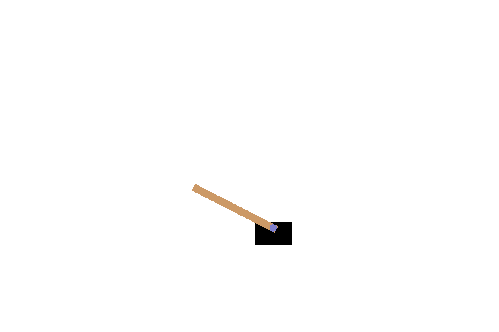

In [86]:
plot_environment(env)

In [90]:
from PIL import Image, ImageDraw

try:
    from pyglet.gl import gl_info
    openai_cart_pole_rendering = True   # no problem, let's use OpenAI gym's rendering function
except Exception:
    openai_cart_pole_rendering = False  # probably no X server available, let's use our own rendering function

def render_cart_pole(env, obs):
    if openai_cart_pole_rendering:
        # use OpenAI gym's rendering function
        return env.render(mode="rgb_array")
    else:
        # rendering for the cart pole environment (in case OpenAI gym can't do it)
        img_w = 600
        img_h = 400
        cart_w = img_w // 12
        cart_h = img_h // 15
        pole_len = img_h // 3.5
        pole_w = img_w // 80 + 1
        x_width = 2
        max_ang = 0.2
        bg_col = (255, 255, 255)
        cart_col = 0x000000 # Blue Green Red
        pole_col = 0x669acc # Blue Green Red

        pos, vel, ang, ang_vel = obs
        img = Image.new('RGB', (img_w, img_h), bg_col)
        draw = ImageDraw.Draw(img)
        cart_x = pos * img_w // x_width + img_w // x_width
        cart_y = img_h * 95 // 100
        top_pole_x = cart_x + pole_len * np.sin(ang)
        top_pole_y = cart_y - cart_h // 2 - pole_len * np.cos(ang)
        draw.line((0, cart_y, img_w, cart_y), fill=0)
        draw.rectangle((cart_x - cart_w // 2, cart_y - cart_h // 2, cart_x + cart_w // 2, cart_y + cart_h // 2), fill=cart_col) # draw cart
        draw.line((cart_x, cart_y - cart_h // 2, top_pole_x, top_pole_y), fill=pole_col, width=pole_w) # draw pole
        return np.array(img)

def plot_cart_pole(env, obs):
    plt.close()  # or else nbagg sometimes plots in the previous cell
    img = render_cart_pole(env, obs)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

In [92]:
obs

array([ 0.03178337,  0.17390635,  0.00365022, -0.29939715])

In [93]:
env.action_space

Discrete(2)

In [96]:
obs = env.reset()
while True:
    obs, reward, done, info = env.step(0)
    if done:
        break

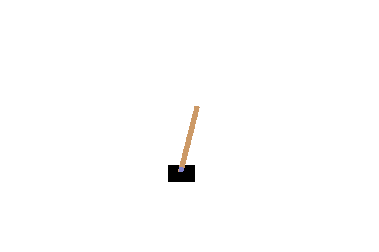

In [97]:
plot_cart_pole(env, obs)

In [98]:
img = render_cart_pole(env, obs)
img.shape

(800, 1200, 3)

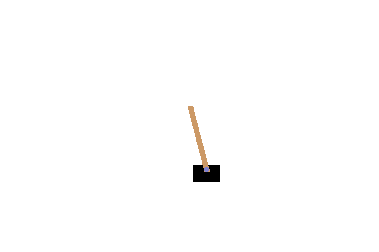

In [99]:
obs = env.reset()
while True:
    obs, reward, done, info = env.step(1)
    if done:
        break
plot_cart_pole(env, obs)

## Neural Network Policies

In [88]:
env.observation_space.shape[0]

4

In [89]:
import tensorflow as tf

n_inputs = 4
n_hidden = 4
n_outputs = 1
initializer = tf.contrib.layers.variance_scaling_initializer()

X = tf.placeholder(tf.float32, shape=(None, n_inputs))
hidden = tf.layers.dense(X, n_hidden, activation=tf.nn.elu,
                        kernel_initializer=initializer)
logits = tf.layers.dense(hidden, n_outputs, activation=tf.nn.elu,
                        kernel_initializer=initializer)
outputs = tf.nn.sigmoid(logits)

p_left_and_right = tf.concat(axis=1, values=(outputs, 1 - outputs))
action = tf.multinomial(tf.log(p_left_and_right), num_samples=1)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.random.categorical instead.


In [100]:
init = tf.global_variables_initializer()

In [104]:
obs.shape, obs.reshape(1, n_inputs).shape

((4,), (1, 4))

In [107]:
n_max_steps = 1000
frames = []

with tf.Session() as sess:
    sess.run(init)
    for step in range(n_max_steps):
        img = render_cart_pole(env, obs)
        frames.append(img)
        action_val = action.eval(feed_dict={X: obs.reshape(1, n_inputs)})
        obs, reward, done, info = env.step(action_val[0][0])
        if done:
            break

/Users/liufang/miniconda3/envs/gluon/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [110]:
action_val

array([[0]])

In [111]:
action_val[0][0]

0

In [112]:
env.close()

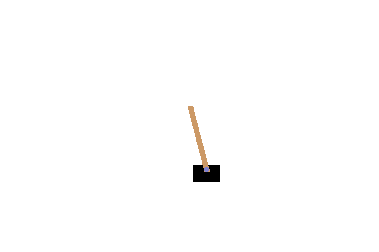

In [113]:
video = plot_animation(frames)
plt.show()

# Policy Gradients

In [121]:
reset_graph()

n_inputs = 4
n_hidden = 4
n_outputs = 1
initializer = tf.contrib.layers.variance_scaling_initializer()

learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n_inputs))
hidden = tf.layers.dense(X, n_hidden, activation=tf.nn.elu,
                        kernel_initializer=initializer)
logits = tf.layers.dense(hidden, n_outputs, activation=None,
                        kernel_initializer=initializer)
outputs = tf.nn.sigmoid(logits)
p_left_and_right = tf.concat(axis=1, values=[outputs, 1 - outputs])
action = tf.multinomial(tf.log(p_left_and_right), num_samples=1)

y = 1 - tf.to_float(action)
cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(
                    labels=y, logits=logits)
optimizer = tf.train.AdamOptimizer(learning_rate)
grads_and_vars = optimizer.compute_gradients(cross_entropy)
gradients = [grad for grad, vars in grads_and_vars]
gradient_placeholders = []
grads_and_vars_feed = []

for grad, variable in grads_and_vars:
    gradient_placeholder = tf.placeholder(tf.float32, shape=grad.get_shape())
    gradient_placeholders.append(gradient_placeholder)
    grads_and_vars_feed.append((gradient_placeholder, variable))
training_op = optimizer.apply_gradients(grads_and_vars_feed)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [148]:
def discount_rewards(rewards, discount_rate):
    discounted_rewards = np.empty(len(rewards))
    cumulative_rewards = 0
    for step in reversed(range(len(rewards))):
        cumulative_rewards = rewards[step] + cumulative_rewards * discount_rate
        discounted_rewards[step] = cumulative_rewards
    return discounted_rewards
    
def discount_and_normalize_rewards(all_rewards, discount_rate):
    all_discounted_rewards = [discount_rewards(rewards, discount_rate=discount_rate)
                             for rewards in all_rewards]
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    return [(discounted_rewards - reward_mean)/reward_std 
           for discounted_rewards in all_discounted_rewards]

In [149]:
discount_rewards([10,0,-50], discount_rate=0.8)

array([-22., -40., -50.])

In [150]:
discount_and_normalize_rewards([[10,0,-50], [10,20]], discount_rate=0.8)

[array([-0.28435071, -0.86597718, -1.18910299]),
 array([1.26665318, 1.0727777 ])]

In [153]:
env = gym.make("CartPole-v0")

n_iterations = 250
n_max_steps = 1000
n_games_per_update = 10
save_iterations = 10
discount_rate = 0.95

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        print("\rIteration: {}".format(iteration), end="")
        all_rewards = []
        all_gradients = []
        for game in range(n_games_per_update):
            current_rewards = []
            current_gradients = []
            obs = env.reset()
            for step in range(n_max_steps):
                action_val, gradients_val = sess.run(
                    [action, gradients],
                    feed_dict={X: obs.reshape(1, n_inputs)})
                obs, reward, done, info = env.step(action_val[0][0])
                current_rewards.append(reward)
                current_gradients.append(gradients_val)
                if done:
                    break
            all_rewards.append(current_rewards)
            all_gradients.append(current_gradients)

        all_wards = discount_and_normalize_rewards(all_rewards, discount_rate=discount_rate)
        feed_dict = {}
        for var_index, grad_placeholder in enumerate(gradient_placeholders):
            mean_gradients = np.mean(
                [reward * all_gradients[game_index][step][var_index]
                for game_index, rewards in enumerate(all_rewards)
                    for step, reward in enumerate(rewards)],
                axis=0)
            feed_dict[grad_placeholder] = mean_gradients
        sess.run(training_op, feed_dict=feed_dict)
        if iteration % save_iterations == 0:
            saver.save(sess, "./my_policy_net_pg.ckpt")

Iteration: 249